# Jaccard similarity score between binary masks- ground truth and segmentation 
## Version using the 'performance' package from Satsense

This notebook illustrates the calculation of the Jaccard index (sklearn implementation) between 2 binary masks for 3 classes of the 2006 QuickBird image of Klayan, India.

## Load the truth and segmentation masks from disk

Python package imports:

In [1]:
# import
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from satsense.util import load_from_file
from satsense.performance.jaccard_similarity import jaccard_index_binary_masks as jibm
%matplotlib inline

Paths and filenames:

In [2]:
# data paths
TRUTH_MASKS_PATH = '/home/elena/DynaSlum/Data/Kalyan/Rasterized_Lourens/'
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Segmentation/'

# masks filenames
ext = 'tif'
slum_mask_fname = 'slums_mask' + '.' + ext
truth_slum_mask_fname = 'all_slums' + '.' + ext
builtup_mask_fname = 'builtup_mask' + '.' + ext
nonbuiltup_mask_fname = 'nonbuiltup_mask' + '.' + ext

# masks full filenames
truth_slum_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_slum_mask_fname)
truth_builtup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, builtup_mask_fname)
truth_nonbuiltup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, nonbuiltup_mask_fname)

result_slum_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, slum_mask_fname)
result_builtup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, builtup_mask_fname)
result_nonbuiltup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, nonbuiltup_mask_fname)


Load the masks onto variables:

In [3]:
_, truth_slum_mask = load_from_file(truth_slum_mask_fullfname)
_, result_slum_mask = load_from_file(result_slum_mask_fullfname)
print("Truth slum mask shape: ", truth_slum_mask.shape)
print("Result slum mask shape: ", result_slum_mask.shape)

_, truth_builtup_mask = load_from_file(truth_builtup_mask_fullfname)
_, result_builtup_mask = load_from_file(result_builtup_mask_fullfname)
print("Truth builtup mask shape: ", truth_builtup_mask.shape)
print("Result builtup mask shape: ", result_builtup_mask.shape)

_, truth_nonbuiltup_mask = load_from_file(truth_nonbuiltup_mask_fullfname)
_, result_nonbuiltup_mask = load_from_file(result_nonbuiltup_mask_fullfname)
print("Truth nonbuiltup mask shape: ", truth_nonbuiltup_mask.shape)
print("Result nonbuiltup mask shape: ", result_nonbuiltup_mask.shape)


Truth slum mask shape:  (6223, 4872, 1)
Result slum mask shape:  (6223, 4872, 1)
Truth builtup mask shape:  (6223, 4872, 1)
Result builtup mask shape:  (6223, 4872, 1)
Truth nonbuiltup mask shape:  (6223, 4872, 1)
Result nonbuiltup mask shape:  (6223, 4872, 1)


Squeeze the unnecessary 3rd empty dimension

In [4]:
truth_slum_mask = np.squeeze(truth_slum_mask)
result_slum_mask = np.squeeze(result_slum_mask)
print("Truth slum mask shape: ", truth_slum_mask.shape)
print("Result slum mask shape: ", result_slum_mask.shape)

truth_builtup_mask = np.squeeze(truth_builtup_mask)
result_builtup_mask = np.squeeze(result_builtup_mask)
print("Truth builtup mask shape: ", truth_builtup_mask.shape)
print("Result builtup mask shape: ", result_builtup_mask.shape)

truth_nonbuiltup_mask = np.squeeze(truth_nonbuiltup_mask)
result_nonbuiltup_mask = np.squeeze(result_nonbuiltup_mask)
print("Truth nonbuiltup mask shape: ", truth_nonbuiltup_mask.shape)
print("Result nonbuiltup mask shape: ", result_nonbuiltup_mask.shape)


Truth slum mask shape:  (6223, 4872)
Result slum mask shape:  (6223, 4872)
Truth builtup mask shape:  (6223, 4872)
Result builtup mask shape:  (6223, 4872)
Truth nonbuiltup mask shape:  (6223, 4872)
Result nonbuiltup mask shape:  (6223, 4872)


Print some slum masks values and visualize them:

Truth slum mask values [20:60,1420:1460]: 
[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]]
Result slum mask alues [20:60,1420:1460]: 
[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [ 255.  255.  255. ...,    0.    0.    0.]
 [ 255.  255.  255. ...,    0.    0.    0.]
 [ 255.  255.  255. ...,    0.    0.    0.]]


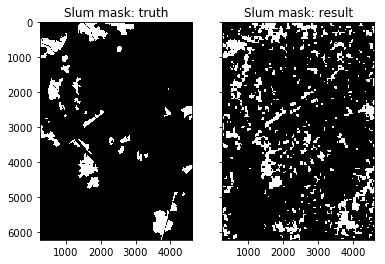

In [5]:
print("Truth slum mask values [20:60,1420:1460]: ")
print(truth_slum_mask[20:60,1420:1460])
print("Result slum mask alues [20:60,1420:1460]: ")
print(result_slum_mask[20:60,1420:1460])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(truth_slum_mask, cmap='gray')
ax1.set_title('Slum mask: truth')
ax2.imshow(result_slum_mask,cmap='gray')
ax2.set_title('Slum mask: result')

Visualize builtup masks:

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(truth_builtup_mask,cmap='gray')
ax1.set_title('Builtup mask: truth')
ax2.imshow(result_builtup_mask,cmap='gray')
ax2.set_title('Builtup mask: result')

MemoryError: 

Visualize nonbuiltup masks:

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(truth_nonbuiltup_mask,cmap='gray')
ax1.set_title('Nonbuiltup mask: truth')
ax2.imshow(result_nonbuiltup_mask,cmap='gray')
ax2.set_title('Nonbuiltup mask: result')

MemoryError: 

## Jaccard Similarity Score (JSS) computation

JSS between truth and result slum masks:

In [8]:
jibm(truth_slum_mask, result_slum_mask)

MemoryError: 

JSS between truth and result buildup masks:

In [ ]:
jibm(truth_builtup_mask, result_builtup_mask)

JSS between truth and result nonbuildup masks:

In [ ]:
jibm(truth_nonbuiltup_mask, result_nonbuiltup_mask)